In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Load and resize the image
def load_and_resize_image(image_path, new_size=(336, 336)):
    image = Image.open(image_path)
    image = image.resize(new_size, Image.Resampling.LANCZOS)
    return image


# Split image into patches and permute
def split_and_permute_image(image, patch_size=(56, 56), grid_size=(6, 6)):
    # Convert the image to a numpy array
    image_array = np.array(image)

    # Split the image array into 6x6 grid of 56x56 patches
    tiles = image_array.reshape(
        grid_size[0], patch_size[0], grid_size[1], patch_size[1], -1
    ).swapaxes(1, 2)

    # Generate a random permutation
    permutation = np.random.permutation(np.arange(grid_size[0] * grid_size[1]))

    # Permute the tiles
    permuted_tiles = tiles.reshape(-1, *patch_size, image_array.shape[2])[permutation]

    # Reshape the permuted tiles back into image format
    permuted_image = (
        permuted_tiles.reshape(grid_size + patch_size + (image_array.shape[2],))
        .swapaxes(1, 2)
        .reshape(336, 336, -1)
    )

    return permuted_image, permutation


# Visualize in Jupyter Notebook
def visualize_permutation(permuted_image):
    plt.imshow(permuted_image)
    plt.axis("off")
    plt.show()

Permutation sequence:
[10 25  7 33 14  0 31  9 26 12  6  3 32 30 20 11 15  1 24 35  8 21  5 13
 19 34 17 27 29  4 22 28 23  2 16 18]


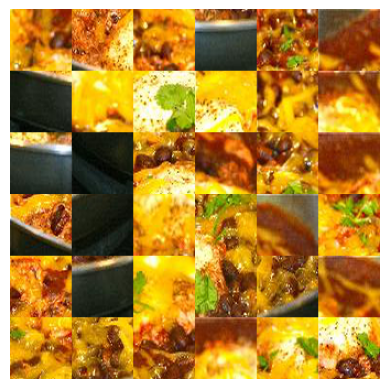

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = "../data/food101/val/0/test_000000.jpg"
image = load_and_resize_image(image_path)
permuted_image, permutation_sequence = split_and_permute_image(image)

# Print the permutation sequence
print("Permutation sequence:")
print(permutation_sequence)

# Visualize the permuted image
visualize_permutation(permuted_image)
Image.fromarray(permuted_image).save("1_perm1.jpg")

In [19]:
list_0 = [
    17,
    21,
    5,
    1,
    13,
    25,
    27,
    22,
    28,
    6,
    24,
    26,
    3,
    16,
    33,
    20,
    7,
    0,
    10,
    18,
    35,
    4,
    19,
    29,
    14,
    9,
    8,
    15,
    30,
    23,
    31,
    12,
    11,
    2,
    34,
    32,
]

list_1 = [
    10,
    25,
    7,
    33,
    14,
    0,
    31,
    9,
    26,
    12,
    6,
    3,
    32,
    30,
    20,
    11,
    15,
    1,
    24,
    35,
    8,
    21,
    5,
    13,
    19,
    34,
    17,
    27,
    29,
    4,
    22,
    28,
    23,
    2,
    16,
    18,
]

list_1_pred = [
    17,
    3,
    33,
    12,
    21,
    2,
    9,
    16,
    26,
    25,
    18,
    32,
    31,
    4,
    24,
    27,
    13,
    0,
    19,
    22,
    15,
    1,
    7,
    29,
    10,
    5,
    11,
    6,
    8,
    23,
    28,
    30,
    35,
    14,
    34,
    20,
]

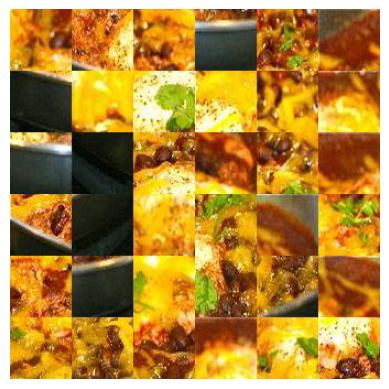

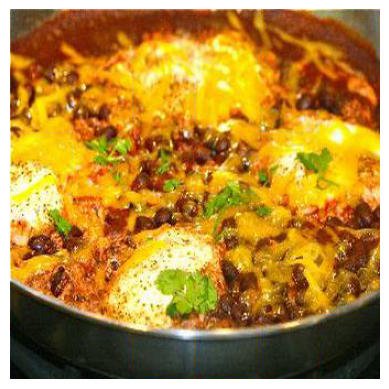

In [37]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Assuming permuted_image is a numpy array and permutation_sequence is a list or numpy array


def restore_original_image(
    permuted_image, permutation_sequence, patch_size=(56, 56), grid_size=(6, 6)
):
    # Calculate the inverse permutation sequence
    inverse_permutation = np.argsort(permutation_sequence)

    # Convert the permuted image to a numpy array if it is not already
    image_array = np.array(permuted_image)

    # Reshape the array to prepare for reordering
    tiles = image_array.reshape(
        grid_size[0], patch_size[0], grid_size[1], patch_size[1], -1
    ).swapaxes(1, 2)

    # Apply the inverse permutation to the tiles
    restored_tiles = tiles.reshape(-1, *patch_size, image_array.shape[2])[
        inverse_permutation
    ]

    # Reshape the restored tiles back into image format
    restored_image = (
        restored_tiles.reshape(grid_size + patch_size + (image_array.shape[2],))
        .swapaxes(1, 2)
        .reshape(grid_size[0] * patch_size[0], grid_size[1] * patch_size[1], -1)
    )

    return restored_image


image_path = "./0_perm1.jpg"
permuted_image = load_and_resize_image(image_path)
visualize_permutation(permuted_image)

# Now apply the function to restore the image
restored_image = restore_original_image(permuted_image, list_1)

# Visualize the restored image
visualize_permutation(restored_image)

In [29]:
_a = np.array(permuted_image).reshape(6, 6, 56, 56, 3).shape